<a href="https://colab.research.google.com/github/Crispardo06/Ventilador_Logica_Difusa/blob/main/Ventilador_Logica_Difusa.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Velocidad del ventilador: 61.09 RPM


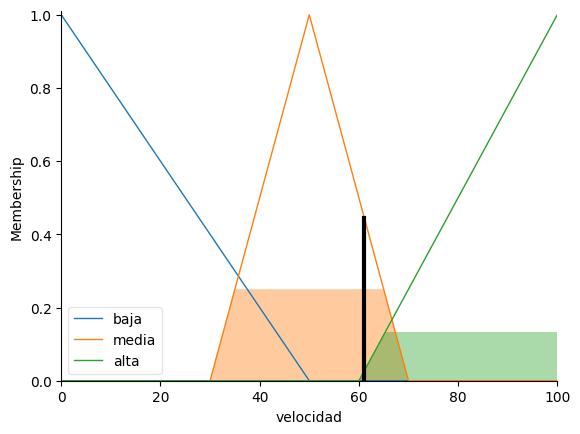

In [5]:
import numpy as np
import skfuzzy as fuzz
from skfuzzy import control as ctrl

# Definición de las variables difusas
temperatura = ctrl.Antecedent(np.arange(0, 41, 1), 'temperatura')
humedad = ctrl.Antecedent(np.arange(0, 101, 1), 'humedad')
velocidad = ctrl.Consequent(np.arange(0, 101, 1), 'velocidad')

# Funciones de pertenencia para temperatura
temperatura['baja'] = fuzz.trimf(temperatura.universe, [0, 0, 20])
temperatura['media'] = fuzz.trimf(temperatura.universe, [15, 25, 30])
temperatura['alta'] = fuzz.trimf(temperatura.universe, [25, 40, 40])

# Funciones de pertenencia para humedad
humedad['baja'] = fuzz.trimf(humedad.universe, [0, 0, 50])
humedad['media'] = fuzz.trimf(humedad.universe, [30, 50, 70])
humedad['alta'] = fuzz.trimf(humedad.universe, [60, 100, 100])

# Funciones de pertenencia para velocidad
velocidad['baja'] = fuzz.trimf(velocidad.universe, [0, 0, 50])
velocidad['media'] = fuzz.trimf(velocidad.universe, [30, 50, 70])
velocidad['alta'] = fuzz.trimf(velocidad.universe, [60, 100, 100])

# Definición de las reglas difusas
reglas = [
    ctrl.Rule(temperatura['baja'] & humedad['baja'], velocidad['baja']),
    ctrl.Rule(temperatura['baja'] & humedad['media'], velocidad['baja']),
    ctrl.Rule(temperatura['baja'] & humedad['alta'], velocidad['media']),
    ctrl.Rule(temperatura['media'] & humedad['baja'], velocidad['media']),
    ctrl.Rule(temperatura['media'] & humedad['media'], velocidad['media']),
    ctrl.Rule(temperatura['media'] & humedad['alta'], velocidad['alta']),
    ctrl.Rule(temperatura['alta'] & humedad['baja'], velocidad['alta']),
    ctrl.Rule(temperatura['alta'] & humedad['media'], velocidad['alta']),
    ctrl.Rule(temperatura['alta'] & humedad['alta'], velocidad['alta']),
]

# Crear el sistema de control difuso
sistema_control = ctrl.ControlSystem(reglas)
simulador = ctrl.ControlSystemSimulation(sistema_control)

# Valores de entrada para temperatura y humedad
simulador.input['temperatura'] = 27  # Cambia este valor según el caso
simulador.input['humedad'] = 65     # Cambia este valor según el caso

# Realizar la simulación
simulador.compute()

# Mostrar el resultado
print(f"Velocidad del ventilador: {simulador.output['velocidad']:.2f} RPM")

# Visualizar el resultado
velocidad.view(sim=simulador)